In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print(mnist.keys)

E:\books_work\HandsOnML_study\env\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<built-in method keys of Bunch object at 0x000001FAD4AFE2C0>


In [3]:
X,y = mnist['data'], mnist['target']
print(X.shape, y.shape)

(70000, 784) (70000,)


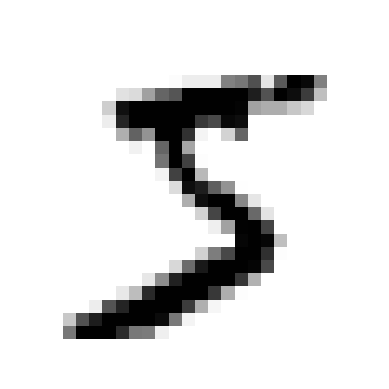

str

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_img = some_digit.reshape(28, 28)

plt.imshow(some_digit_img, cmap='binary')
plt.axis('off')
plt.show()
(type(y[0]))

In [5]:
import numpy as np
y = y.astype(np.uint8)

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
#for binary classifier
y_train_5 = (y_train == 5)
y_test_5 =  (y_test == 5)

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    x_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

0.9701
0.9614
0.9586


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
print(scores)

[0.95035 0.96035 0.9604 ]


In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [ ]:
never_5_clf = Never5Classifier()
scores = cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')
print(scores)

[0.91125 0.90855 0.90915]


In [ ]:
#this is why 'accuracy' not preferred to test classifiers' performance

In [ ]:
#confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
print(confusion_matrix(y_train_5, y_train_pred))

[[53892   687]
 [ 1891  3530]]


In [ ]:
y_train_pred_perfect = y_train_5
print(confusion_matrix(y_train_5, y_train_pred_perfect))


[[54579     0]
 [    0  5421]]


---

Precision = Tp / (TP + FP)

Recall = TP / (TP + FN)

In [ ]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))

0.8370879772350012


In [ ]:
print(recall_score(y_train_5, y_train_pred))

0.6511713705958311


---

F1 Score
F1 = 2 / ((1/precision)+(1/recall)) = 2 * (precision * recall) / (precision + recall)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;= TP/[TP + (FN+FP)/2]

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_train_5, y_train_pred))

0.7325171197343846


In [ ]:
y_score = sgd_clf.decision_function([some_digit])
print(y_score)

[2164.22030239]


In [ ]:
thres = 0
y_some_digit_pred = y_score > thres
print(y_some_digit_pred)

[ True]


In [ ]:
thres = 8000
y_some_digit_pred = y_score > thres
print(y_some_digit_pred)

[False]


In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method='decision_function')

In [ ]:
from sklearn.metrics import precision_recall_curve

prec, rec, thres = precision_recall_curve(y_train_5, y_scores)

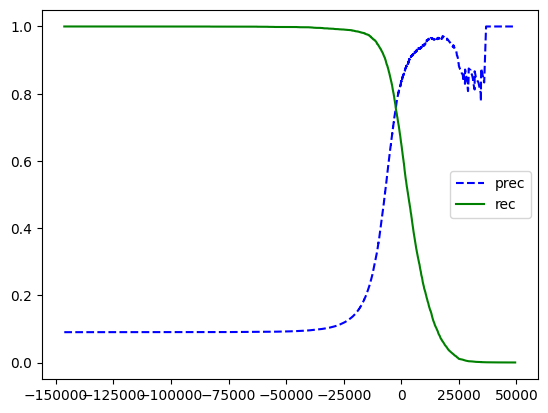

In [ ]:
def plot_prec_recall_vs_thres(prec, rec, thres):
    plt.plot(thres, prec[:-1], 'b--', label='prec')
    plt.plot(thres, rec[:-1], 'g-', label='rec')
    plt.legend(['prec', 'rec'])

plot_prec_recall_vs_thres(prec, rec, thres)
plt.show()

In [ ]:
thres_90_prec = thres[np.argmax(prec >= 0.90)]

In [ ]:
y_train_pred_90 = y_scores >= thres_90_prec

In [ ]:
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))


0.9000345901072293
0.4799852425751706


---

ROC(receiver operating characteristic) curve

FPR = FP / (FP+TN) = (FP+TN-TN)/(FP+TN) = 1-TN/(FP+TN) = 1-TNR

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thres = roc_curve(y_train_5, y_scores)

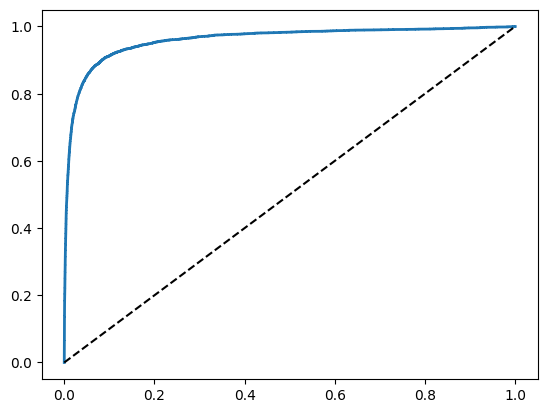

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')

plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5, y_scores))

0.9604938554008616


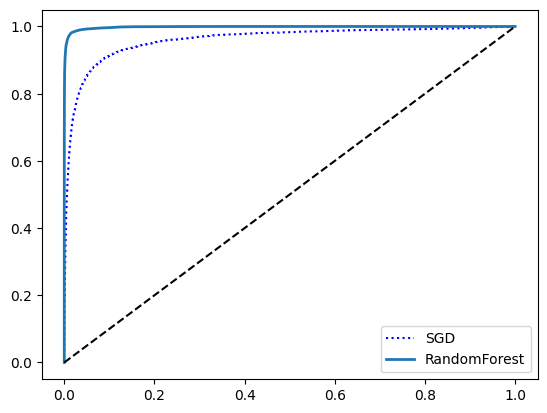

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method='predict_proba')
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thres_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, label='RandomForest')
plt.legend(loc='lower right')
plt.show()

---

Multiclass(Multinomial) Classifier

OvR(one-versus-the-rest)<br>
OvA(one-versus-all)<br><br>
OvO(one-versus-one) : N * (N-1)/2

In [9]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) #use OvO
print(svm_clf.predict([some_digit]))

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
print(some_digit_scores, svm_clf.classes_[ np.argmax(some_digit_scores)])

[[ 1.72501977  2.72809088  7.2510018   8.3076379  -0.31087254  9.3132482
   1.70975103  2.76765202  6.23049537  4.84771048]] 5


In [8]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
print(ovr_clf.predict([some_digit]), len(ovr_clf.estimators_))


[5] 10


In [15]:
sgd_clf =SGDClassifier()
sgd_clf.fit(X_train, y_train)
print(sgd_clf.predict([some_digit]))

[5]


In [18]:
sgd_clf.decision_function([some_digit])

array([[-24780.71808227, -23066.14365563, -12878.66062373,
          1058.72557094, -28435.68198952,   2881.76777879,
        -30607.79799169, -15970.3391008 , -10536.1899914 ,
        -17969.16201938]])

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.86485, 0.8802 , 0.88495])

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, scoring='accuracy')

array([0.90208333, 0.89708333, 0.88983333, 0.89433333, 0.90333333])

In [29]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

E:\books_work\HandsOnML_study\env\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[[5566    0   21    7    8   41   34    5  240    1]
 [   1 6407   37   23    4   44    4    8  202   12]
 [  26   29 5235   92   69   26   66   36  373    6]
 [  24   17  114 5222    2  201   26   42  414   69]
 [  11   14   45    9 5202   11   37   27  324  162]
 [  26   15   31  166   53 4451   79   17  527   56]
 [  31   17   41    2   42   94 5555    4  131    1]
 [  19    9   51   25   50   14    3 5702  191  201]
 [  18   67   45   91    3  119   25   10 5431   42]
 [  21   18   30   64  118   36    1  177  379 5105]]


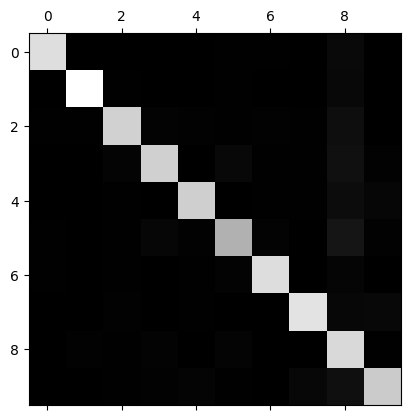

In [31]:
import matplotlib.pyplot as plt
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

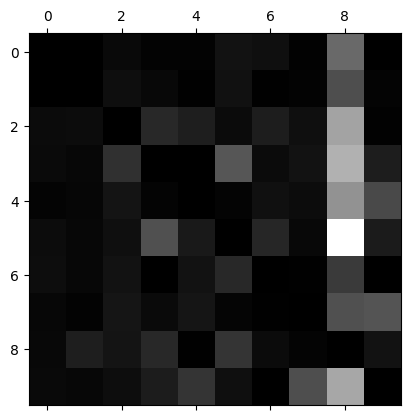

In [33]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [34]:
#multilabel classification

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [35]:
print(knn_clf.predict([some_digit]))


[[False  True]]


In [36]:
from sklearn.metrics import f1_score
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
print(f1_score(y_multilabel, y_train_knn_pred, average='macro'))

0.976410265560605


In [42]:
#multioutput-multiclass classification
noise = np.random.randint(0,100,(len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

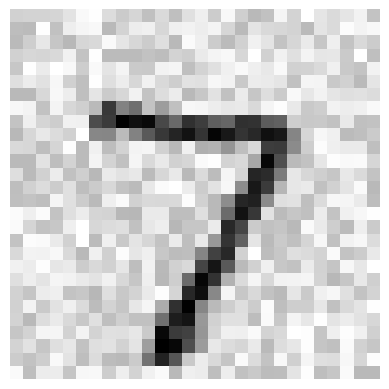

In [45]:
plt.imshow(X_test_mod[0].reshape(28,28), cmap='binary')
plt.axis('off')
plt.show()

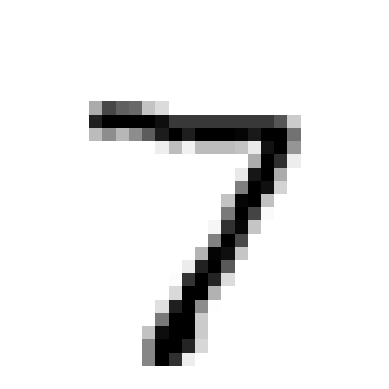

In [46]:
plt.imshow(y_test_mode[0].reshape(28,28), cmap='binary')
plt.axis('off')
plt.show()

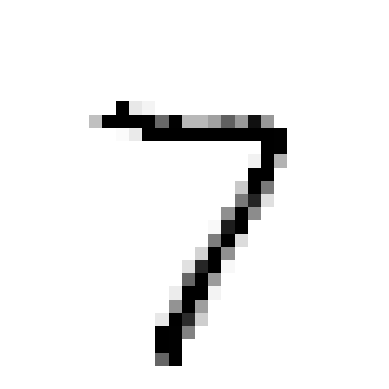

In [47]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
clean_digit = clean_digit.reshape(28,28)
plt.imshow(clean_digit, cmap='binary')
plt.axis('off')
plt.show()